<a href="https://colab.research.google.com/github/ArthurMarchiDS/Portfolio/blob/master/An%C3%A1lise_Doen%C3%A7as_Cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória - Doenças Cardiovasculares

As Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam o sistema central que é o coração e o sistema periférico incluindo os vasos sanguíneos, dentre eles artérias, veias e vasos capilares.

As doenças cardiovasculares são responsáveis por milhares de mortes no mundo todo, muitas delas preveníveis.

As doenças cardiovasculares causam 2,3 vezes mais mortes que todas as causas externas (acidentes e violência).

As doenças cardiovasculares são responsáveis por 6,5 vezes mais mortes por infecções, incluindo a AIDS.

O AVC é a segunda causa isolada de mortes no Brasil.

As doenças cardiovasculares representam 30% do total óbitos no Brasil.

## Obtenção dos Dados

O conjunto de dados usado nessa análise foi retirado da ***Cleveland Clinic Foundation*** e pode ser obtida no [Repositório UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/heart+Disease).

O Dataset contém dados de 303 pessoas e 14 atributos.

* O arquivo pode ser acessado nesse [link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv)
* Foi utilizado também um Dataset com dados contendo o número de mortes por doenças cardiovasculares no Brasil fornecido pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), os dados podem ser baixados nesse [link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).

### Informações sobre os atributos

* *age* - idade em anos
* *sex* - sexo do paciente
    0: mulher
    1: homem
* *cp *- tipo da dor torácica
    1: angina típica
    2: angina atípica
    3: dor não cardíaca
    4: assintomática
* *trestbps* - pressão arterial em repouso
* *chol* - colesterol sérico (mg/dl)
* *fbs* - açucar no sangue em jejum > 120mg/dl
    0: False
    1: True
* *restecg* - resultado do eletrocardiografia de repouso
    0: normal
    1: anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV)
    2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* *thalach* - frequência cardíaca máxima atingida
* *exang* - angina induzida pelo exercício
    0: não
    1: sim
* *oldpeak* - depessão do segmento ST induzida pelo exercício em relação ao repouso
* *slope* - inclinação do segmento ST no pico do exercício
* *ca* - número de vasos principais colorido por fluoroscopia
* *thal* - thallium stress test
    3: normal
    6: defeito fixo
    7: defeito reversível
* *num* - diagnóstico de doença cardíaca (diagnóstico angiográfico)
    0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
    1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importando os Dados

Vamos importar as bibliotecas necessárias para a análise e importaremos os dados.

Como dito acima, iremos importar dois Datasets, um contendo os dados da **Cleveland Clinic Foundation** e outro contendo o número de mortes por doenças cardiovasculares no Brasil.

In [1]:
!pip install pywaffle -q # o pywaffle não vem pré instalado no Colab, portanto antes da importação é necessário fazer a instalação.

     |████████████████████████████████| 532kB 2.7MB/s 


In [0]:
# Importando as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
import seaborn as sns

In [0]:
# Importando os dados
Df_Uci = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv')

In [0]:
Df_Brasil = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv')

In [5]:
Df_Uci.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


No tópico 'Informações sobre os atributos' a coluna 'num' possui variáveis de 1 à 4, iremos substituir os valores de 2, 3 e 4 para 1, pois na análise iremos usar apenas os valores de 0 e 1.

In [6]:
Df_Uci.num.value_counts() # Vemos a quantidade de cada atributo.

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [0]:
Df_Uci.loc[Df_Uci.num != 0, 'num'] = 1

In [8]:
Df_Uci.num.value_counts()# Agora já transformamos nossos parâmetros.

0    164
1    139
Name: num, dtype: int64

## Análise Exploratória

In [9]:
# Aqui podemos ver o tamanho do Dataset.

print('Quantidade de linhas: ', Df_Uci.shape[0])
print('Quantidade de Colunas: ', Df_Uci.shape[1])

Quantidade de linhas:  303
Quantidade de Colunas:  14


In [10]:
# Análises estatísticas.

Df_Uci.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [11]:
# Primeiras entradas para ver como o dataset está distríbuido.

Df_Uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [12]:
# Contar quantos valores possuem ou não doenças cardíacas, sendo 0(Não tem doença) e 1(Possui doença).

Df_Uci.num.value_counts()

0    164
1    139
Name: num, dtype: int64

In [13]:
#Verificando se possui valores ausentes no Dataset.
# Podemos concluir que todas as colunas do Dataset estão preenchidas.
Df_Uci.notnull().sum()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
num         303
dtype: int64

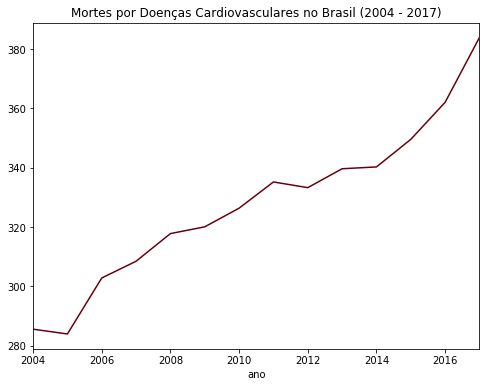

In [14]:
Df_Brasil.plot(x = 'ano', figsize=(8,6), title = 'Mortes por Doenças Cardiovasculares no Brasil (2004 - 2017)', legend = False, colormap = 'Reds_r');

In [15]:
#Podemos ver a quantidade de Homens e Mulheres, sendo 0(Mulher) e 1(Homem).

Df_Uci.sex.value_counts()


1.0    206
0.0     97
Name: sex, dtype: int64

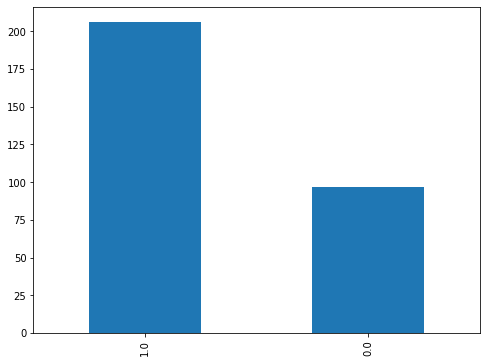

In [16]:
Df_Uci.sex.value_counts().plot(kind='bar', figsize=(8,6));

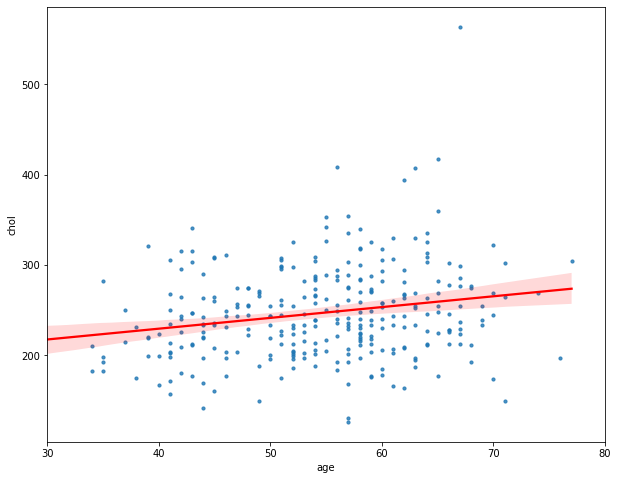

In [17]:
fig, ax = plt.subplots(figsize = (10,8))

ax.set_xlim(left = 30, right = 80)
sns.regplot('age', 'chol', scatter_kws={'s':10}, line_kws = {'color': 'red'}, data = Df_Uci, ax = ax);



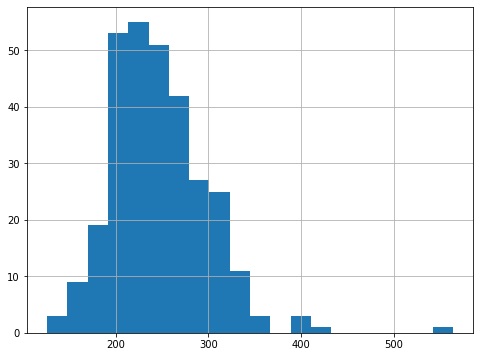

In [18]:
Df_Uci.chol.hist(bins = 20, figsize=(8,6));

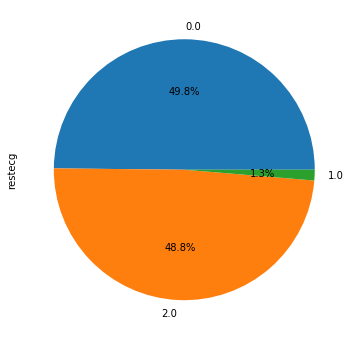

In [60]:
#Conforme descrito no tópico 'Informações sobre os atributos', a variável 'restecg', os valores na tabela correspondem à 0: normal, 1: anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV) e 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
Df_Uci.restecg.value_counts().plot(kind='pie', figsize=(6,6),autopct='%1.1f%%');

In [0]:
corr = Df_Uci.corr()

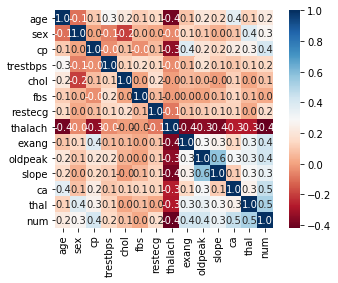

In [28]:
sns.heatmap(corr,cmap='RdBu', fmt='0.1f', square=True, linecolor='white', annot=True, );

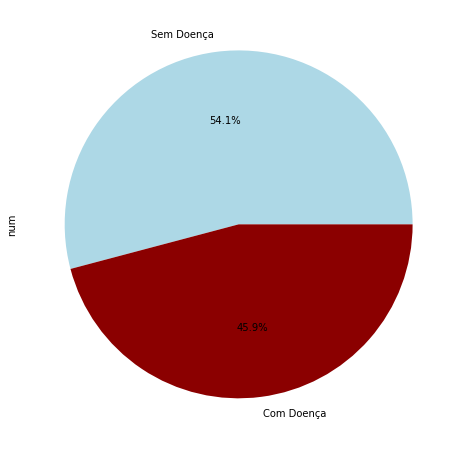

In [68]:
Df_Uci.num.value_counts().plot(kind='pie',figsize=(10,8), labels = ('Sem Doença', 'Com Doença'), colors = ('lightblue', 'darkred'), autopct='%1.1f%%');


## Conclusão

O objetivo dessa análise exploratória foi de tirar insights e analisar o comportamento da amostra no referido estudo.

Através dessa análise podemos observar que de toda a quantidade de nossa amostra, quase metade sofre de alguma doença cardiovascular, entretanto sabe-se que uma das formas de prevenção seria o controle de fatores de riscos para a população em geral, não para apenas metade da amostra.

Vimos também no gráfico de dispersão onde foi analisado a idade e o colesterol, e vimos que conforme a idade avança, ocorre também o aumento da taxa de colesterol, que é um dos fatores de risco para doenças cardiovasculares.

Foi feita apenas uma análise superficial, com os dados fornecidos seriam possiveis novas análises e novas intersecções entre os fatores de risco.

